In [1]:
import tensorflow as tf

In [2]:
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.1


In [3]:
print(f"Keras version: {tf.keras.__version__}")

Keras version: 2.4.0


In [4]:
tf.config.list_physical_devices("GPU")

[]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0:
        print(f"{device} is available")
        print(f"details\n", out)
    else:
        print(f"{device} not available")

GPU not available
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9 
* Each data point is 2D array of 28x28 size. 
* Also known as hello world dataset for ANN 

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png) 

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
mnist

<module 'tensorflow.keras.datasets.mnist' from 'c:\\users\\srini\\anaconda3\\envs\\tensorflow2\\lib\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [11]:
X_train_full[30]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_train_full[30]

3

In [15]:
print(X_train_full.dtype,  "-",  X_train_full.shape)

uint8 - (60000, 28, 28)


In [16]:
print(y_train_full.dtype,  "-",  y_train_full.shape)

uint8 - (60000,)


In [17]:
print(X_test.dtype,  "-",  X_test.shape)

uint8 - (10000, 28, 28)


In [18]:
print(y_test.dtype,  "-",  y_test.shape)

uint8 - (10000,)


In [21]:
# Scale the data b/w 0 and 1 by dividing it by 255 as its unsigned int

X_train_full = X_train_full/255.
X_test = X_test/255.

In [22]:
X_train_full[30]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
# Create the validation data from training data.

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [24]:
X_train.shape

(55000, 28, 28)

In [25]:
X_valid.shape

(5000, 28, 28)

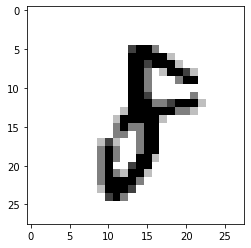

In [26]:
# view the actual image at index 30
plt.imshow(X_train[30], cmap='binary')

<AxesSubplot:>

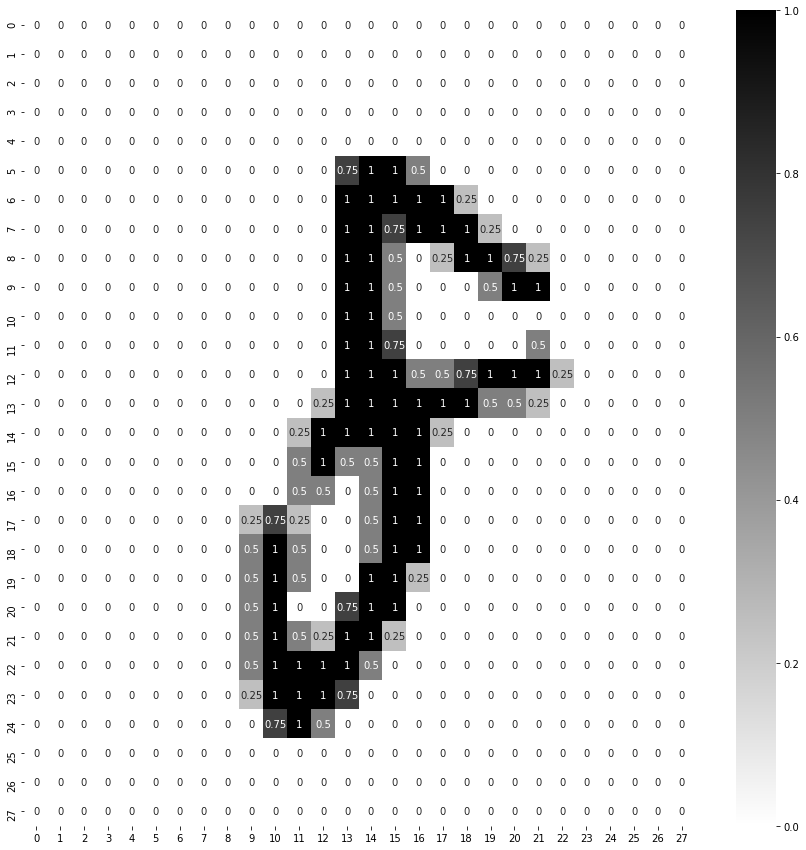

In [27]:
# Lets look at the pixels in detail using SNS

plt.figure(figsize=(15,15))
sns.heatmap(X_train[30], annot=True, cmap='binary')

In [28]:
# lets create the model
# Flatten = make the array to sequential
# Dense = creating a hidden OR output layer

LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
         tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
         tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
         tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model = tf.keras.models.Sequential(LAYERS)

In [29]:
model.layers

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Trainable Params (Nodes in layer A * Nodes in layer B + Bias)
# first layer = 784*300 + 300 = 235500
# second layer = 300*100 + 100 = 30100
# output layer = 100*10 + 10 = 1010

In [32]:
hidden1 = model.layers[1]
hidden1.name

'hiddenLayer1'

In [34]:
weights, biases = hidden1.get_weights()

In [35]:
weights.shape

(784, 300)

In [36]:
biases.shape

(300,)

In [37]:
weights

array([[ 1.3120070e-02,  4.9869642e-03, -2.2609290e-02, ...,
        -6.7381829e-02,  6.4482987e-02, -6.4863965e-02],
       [ 4.8323184e-02,  1.4148779e-02,  3.2658987e-02, ...,
        -3.9048344e-02, -9.1419369e-04,  1.3638459e-02],
       [-5.4612756e-05, -5.6279372e-02, -4.3755490e-02, ...,
        -1.8740345e-02, -2.0117208e-02,  5.7864517e-02],
       ...,
       [-3.3953249e-02, -6.8958089e-02, -5.5737622e-02, ...,
         3.6452107e-02, -5.8617771e-02,  6.6501588e-02],
       [ 5.4108486e-02, -6.4810857e-02,  3.8713217e-03, ...,
        -6.7572214e-02,  1.5352644e-02, -1.7083574e-02],
       [ 2.2700109e-02, -5.3976677e-02, -5.7482719e-03, ...,
        -4.7747944e-02, -1.6034596e-02, -1.1332184e-03]], dtype=float32)

In [38]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [39]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
             optimizer=OPTIMIZER,
             metrics=METRICS)

In [ ]:
# Default values
# batch size=32

# No. of batches = X_train.shape/batch_size, 55000/32 = 1719 

In [40]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                   validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6110 - accuracy: 0.8479 - val_loss: 0.3095 - val_accuracy: 0.9162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2867 - accuracy: 0.9175 - val_loss: 0.2354 - val_accuracy: 0.9360
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2328 - accuracy: 0.9341 - val_loss: 0.2017 - val_accuracy: 0.9450
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1986 - accuracy: 0.9433 - val_loss: 0.1725 - val_accuracy: 0.9506
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1736 - accuracy: 0.9502 - val_loss: 0.1547 - val_accuracy: 0.9584
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1536 - accuracy: 0.9558 - val_loss: 0.1414 - val_accuracy: 0.9620
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1376 - accuracy: 0.9610 - val_loss: 0.1268 - val_accuracy:

In [ ]:
# Epoch 1/30
# 1719/1719 [==============================] - 5s 3ms/step - loss: 0.6110 - accuracy: 0.8479 - val_loss: 0.3095 - val_accuracy: 0.9162

# 1719 = No of batches
# 5s = 5 seconds for one single Epoch
# 3ms/step = time taken for one batch
# loss: 0.6110 = trianing loss (summation of all losses in all batches)
# accuracy: 0.8479 = training accuracy (summation for all batches)
# val_loss: 0.3095 = validation loss
# val_accuracy: 0.9162 = validation accuracy

In [41]:
import time
import os

def saveModel(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"Models will be saved at location\n{model_path}")
    return model_path

In [42]:
path = model.save(saveModel())

Models will be saved at location
SAVED_MODELS\Model_2020_11_28_00_58_04_.h5


In [43]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [44]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.611004,0.847945,0.309500,0.9162
1,0.286699,0.917473,0.235411,0.9360
2,0.232804,0.934055,0.201651,0.9450
3,0.198615,0.943273,0.172454,0.9506
4,0.173572,0.950236,0.154681,0.9584
5,0.153581,0.955800,0.141441,0.9620
6,0.137637,0.961036,0.126763,0.9640
7,0.124263,0.964473,0.119408,0.9678
8,0.113482,0.967455,0.111402,0.9686
9,0.103867,0.970691,0.105972,0.9704


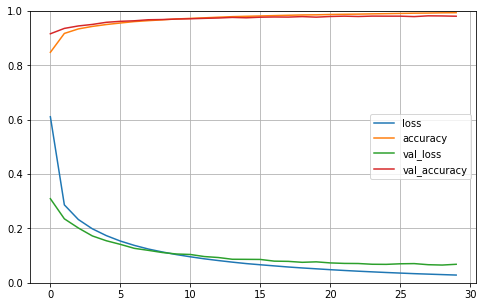

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [47]:
# validate against test data now
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9763


[0.07336997985839844, 0.9763000011444092]

In [48]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

In [50]:
y_test_new = y_test[:3]

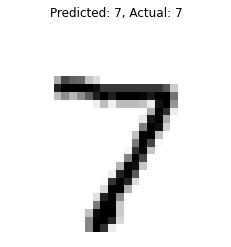

------------------------------------------------------------


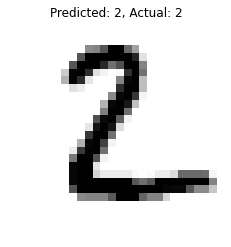

------------------------------------------------------------


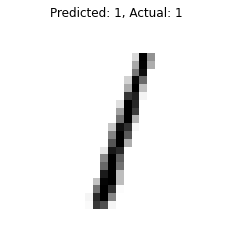

------------------------------------------------------------


In [51]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [ ]:
# https://tensorspace.org/html/playground/lenet.html - Visualize in 3d way